<a href="https://colab.research.google.com/github/Saiesh-Halshikar/Amazon-employee-Access/blob/main/Amazon_Employee_Acccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/amazontrain.csv')
print(data.shape)
data.head()

(32769, 10)


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
data_explore = data.copy()

In [4]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
data_explore.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

<Axes: xlabel='ACTION', ylabel='count'>

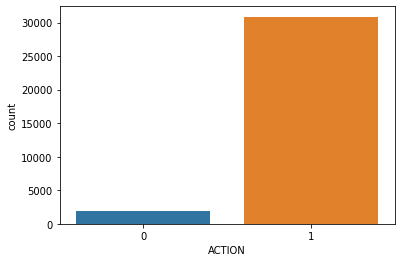

In [6]:
sns.countplot(x='ACTION', data=data_explore)



    In dataset description it is mention that an employee can have only one manager at a time, then we can consider that the dataset contains information of maximum 4243 employees.
    There are same number of unique values for ROLE_TITLE and ROLE_CODE. There is 1-to-1 mapping between these columns. So for our problem only one feature is sufficent.



Lets find out top 15 Resources, Role department, Role family, Role codes for which most access is requested.

In [7]:
data_explore_resources = data_explore[['RESOURCE', "ACTION"]].groupby(by='RESOURCE').count()
data_explore_resources.sort_values('ACTION', ascending=False).head(n=15).transpose()

RESOURCE,4675,79092,25993,75078,3853,75834,6977,32270,42085,17308,1020,13878,42093,18418,7543
ACTION,839,484,409,409,404,299,299,295,247,239,236,220,204,192,186


In [8]:
data_explore_role_dept = data_explore[['ROLE_DEPTNAME', "ACTION"]].groupby(by='ROLE_DEPTNAME').count()
data_explore_role_dept.sort_values('ACTION', ascending=False).head(n=15).transpose()

ROLE_DEPTNAME,117878,117941,117945,118514,117920,117884,119598,118403,119181,120722,118320,117895,118746,118783,120663
ACTION,1135,763,659,601,597,546,543,532,525,501,435,431,415,366,335


In [11]:
data_explore_role_codes = data_explore[['ROLE_CODE', "ACTION"]].groupby(by='ROLE_CODE').count()
data_explore_role_codes.sort_values('ACTION', ascending=False).head(n=15).transpose()

ROLE_CODE,118322,117908,118786,117880,118570,117888,118055,118687,118779,118454,120346,118332,119082,117973,118425
ACTION,4649,3583,1772,1256,1043,806,774,597,566,521,473,467,394,384,376


In [12]:
data_explore_role_family = data_explore[['ROLE_FAMILY', "ACTION"]].groupby(by='ROLE_FAMILY').count()
data_explore_role_family.sort_values('ACTION', ascending=False).head(n=15).transpose()

ROLE_FAMILY,290919,118424,19721,117887,292795,118398,308574,118453,118331,118643,118638,270488,118295,118960,118205
ACTION,10980,2690,2636,2400,1318,1294,1287,941,892,783,783,689,493,465,449


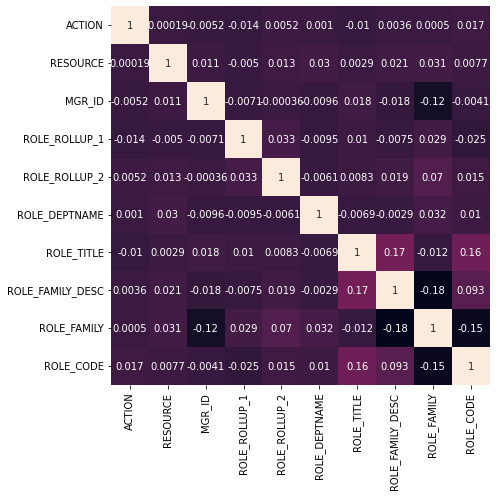

In [13]:
plt.figure(figsize=(12, 7))
corr_matrix = data_explore.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)
plt.tight_layout()

In [14]:


corr_matrix['ACTION'].sort_values(ascending=False)



ACTION              1.000000
ROLE_CODE           0.017147
ROLE_ROLLUP_2       0.005179
ROLE_FAMILY_DESC    0.003565
ROLE_DEPTNAME       0.001025
ROLE_FAMILY         0.000502
RESOURCE            0.000185
MGR_ID             -0.005167
ROLE_TITLE         -0.010169
ROLE_ROLLUP_1      -0.013702
Name: ACTION, dtype: float64

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
X = data.drop(columns=['ACTION'], axis=1).copy()
y = data['ACTION'].copy()
X.shape, y.shape

((32769, 9), (32769,))

In [17]:
cat_attrs = list(X.columns)
cat_attrs

['RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_TITLE',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

X_train = strat_train_set.drop('ACTION', axis=1)
y_train = strat_train_set['ACTION'].copy()
X_test = strat_test_set.drop('ACTION', axis=1)
y_test = strat_test_set['ACTION'].copy()
X_train.shape, X_test.shape

((26215, 9), (6554, 9))

In [19]:
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_enc', OneHotEncoder(handle_unknown='ignore'))])

pre_process = ColumnTransformer([('cat_process', cat_pipeline, cat_attrs)], remainder='passthrough')

X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((26215, 14410), (6554, 14410))

In [20]:
#Since I will be using CatBoost Classifier. For CatBoost model, there is no need of encoding categorical model. Hence I will be creating a separate preprocessing pipeline for CatBoost model.
cat_boost_pre_process = ColumnTransformer([('imputer', SimpleImputer(strategy='most_frequent'), cat_attrs)], remainder='passthrough')

X_cb_train_transformed = cat_boost_pre_process.fit_transform(X_train)
X_cb_test_transformed = cat_boost_pre_process.transform(X_test)
X_cb_train_transformed.shape, X_cb_test_transformed.shape

((26215, 9), (6554, 9))

In [25]:
feature_columns = list(pre_process.transformers_[0][1]['cat_enc'].get_feature_names_out(cat_attrs))
len(feature_columns)

14410

Evaluation metric for this competition is ROC AUC Score.
Since we have imbalance dataset, I will use Matthews correlation coefficient (MCC) as another evaluation metric.

Value of MCC is lies between -1 to +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

MCC value will be high only if model has high accuracy on predictions of negative data instances as well as of positive data instances.
I will be selecting the best model with highest ROC AUC Score.

In [26]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
from sklearn.metrics import matthews_corrcoef, make_scorer, roc_auc_score, roc_curve
Matthew = make_scorer(matthews_corrcoef)

results = []

def plot_custom_roc_curve(clf_name, y_true, y_scores):
    auc_score = np.round(roc_auc_score(y_true, y_scores), 3)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=clf_name+" (AUC Score: {})".format(str(auc_score)))
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR", fontsize=16)
    plt.legend()

In [28]:
def performance_measures(model, X_tr=X_train_transformed, y_tr=y_train, X_ts=X_test_transformed, y_ts=y_test,
                         store_results=True):
    train_mcc = cross_val_score(model, X_tr, y_tr, scoring=Matthew, cv=kf, n_jobs=-1)
    test_mcc = cross_val_score(model, X_ts, y_ts, scoring=Matthew, cv=kf, n_jobs=-1)
    print("Mean Train MCC: {}\nMean Test MCC: {}".format(train_mcc.mean(), test_mcc.mean()))

    
    train_roc_auc = cross_val_score(model, X_tr, y_tr, scoring='roc_auc', cv=kf, n_jobs=-1)
    test_roc_auc = cross_val_score(model, X_ts, y_ts, scoring='roc_auc', cv=kf, n_jobs=-1)
    print("Mean Train ROC AUC Score: {}\nMean Test ROC AUC Score: {}".format(train_roc_auc.mean(), test_roc_auc.mean()))
    
    if store_results:
        results.append([model.__class__.__name__, np.round(np.mean(train_roc_auc), 3), np.round(np.mean(test_roc_auc), 3), np.round(np.mean(train_mcc), 3), np.round(np.mean(test_mcc), 3)])

In [29]:
def plot_feature_importance(feature_columns, importance_values, top_n_features=10):
    feature_imp = [ col for col in zip(feature_columns, importance_values)]
    feature_imp.sort(key=lambda x:x[1], reverse=True)
    
    if top_n_features:
        imp = pd.DataFrame(feature_imp[0:top_n_features], columns=['feature', 'importance'])
    else:
        imp = pd.DataFrame(feature_imp, columns=['feature', 'importance'])
    plt.figure(figsize=(10, 8))
    sns.barplot(y='feature', x='importance', data=imp, orient='h')
    plt.title('Most Important Features', fontsize=16)
    plt.ylabel("Feature", fontsize=16)
    plt.xlabel("")
    plt.show()

# XGBoost

In [30]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=300, max_depth=16, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_clf.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

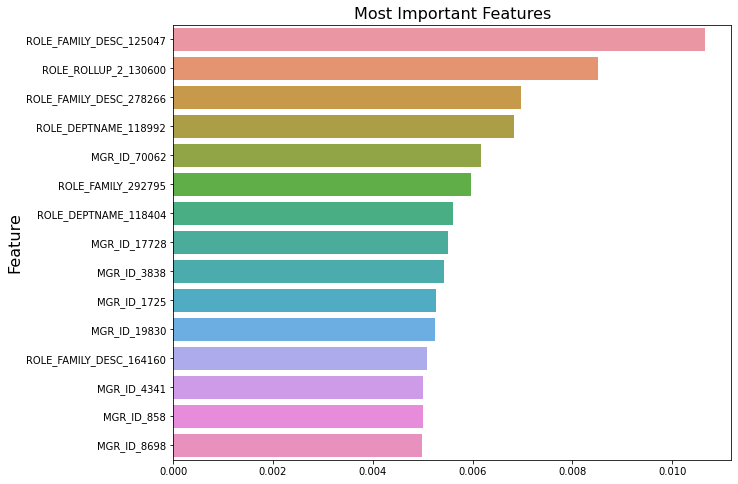

In [32]:
plot_feature_importance(feature_columns, xgb_clf.feature_importances_, top_n_features=15)

In [33]:
performance_measures(xgb_clf)

Mean Train MCC: 0.39076287637260154
Mean Test MCC: 0.22660323395234597
Mean Train ROC AUC Score: 0.8358825281806868
Mean Test ROC AUC Score: 0.7254743012261117


# CatBoost

In [35]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.7 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(loss_function='Logloss', iterations=500, depth=6, l2_leaf_reg=1, 
                                  cat_features=list(range(X_cb_train_transformed.shape[1])), 
                                  eval_metric='AUC', random_state=42, verbose=0)
catboost_clf.fit(X_cb_train_transformed, y_train)

In [37]:
performance_measures(catboost_clf, X_tr=X_cb_train_transformed, X_ts=X_cb_test_transformed)

Mean Train MCC: 0.48612159870279703
Mean Test MCC: 0.25841488658401285
Mean Train ROC AUC Score: 0.879149762494999
Mean Test ROC AUC Score: 0.7782526101252574


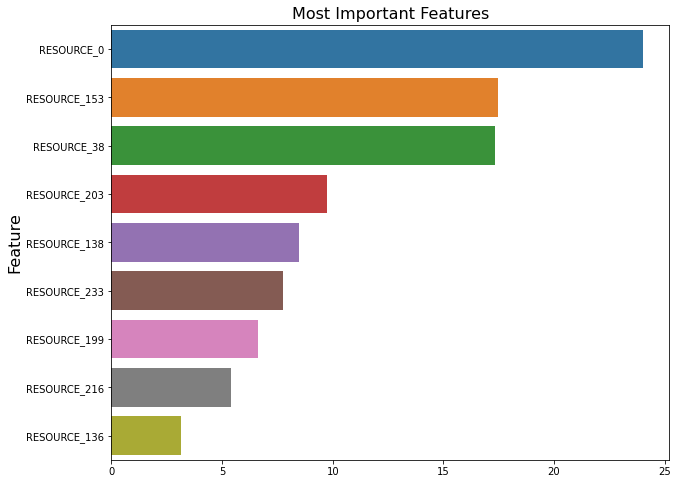

In [38]:
plot_feature_importance(feature_columns, catboost_clf.feature_importances_, top_n_features=15)

LightGBM

In [45]:
! pip3 install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train_transformed, y_train)

LGBMClassifier()

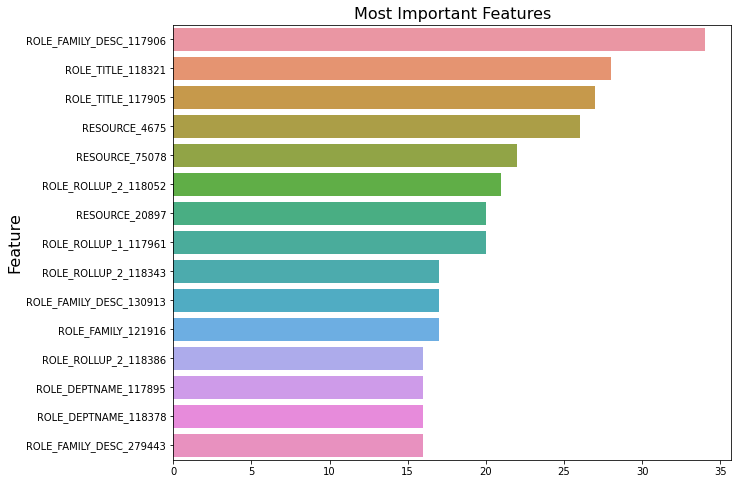

In [40]:
plot_feature_importance(feature_columns, model.feature_importances_, top_n_features=15)

In [41]:
performance_measures(model)

Mean Train MCC: 0.2612816041213997
Mean Test MCC: 0.1476472970086459
Mean Train ROC AUC Score: 0.8179167028928006
Mean Test ROC AUC Score: 0.7277594415129435


In [42]:
xgb_clf_pipeline = Pipeline([('pre_process', pre_process), ('xgb_clf', xgb_clf)])
catboost_clf_pipeline = Pipeline([('pre_process', cat_boost_pre_process), ('catboost_clf', catboost_clf)])
model_pipeline = Pipeline([('pre_process', pre_process), ('model', model)])

named_estimators = [('xgb_clf', xgb_clf_pipeline), ('catboost_clf', catboost_clf_pipeline), ('model', model_pipeline)]

Model Evaluation

In [43]:
result_df = pd.DataFrame(results, columns=['Model', 'CV Train AUC Score', 'CV Test AUC Score', 'CV Train MCC', 'CV Test MCC'])
result_df

,Model,CV Train AUC Score,CV Test AUC Score,CV Train MCC,CV Test MCC
0,XGBClassifier,0.836,0.725,0.391,0.227
1,CatBoostClassifier,0.879,0.778,0.486,0.258
2,LGBMClassifier,0.818,0.728,0.261,0.148


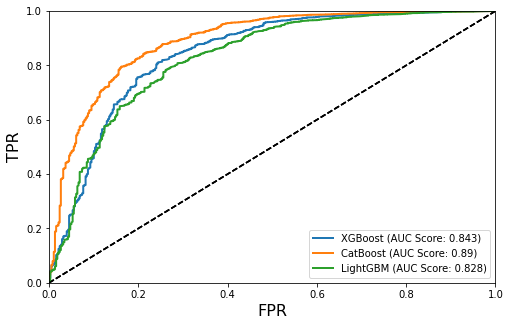

In [44]:
plt.figure(figsize=(8, 5))
plot_custom_roc_curve('XGBoost', y_test, xgb_clf.predict_proba(X_test_transformed)[:,1])
plot_custom_roc_curve('CatBoost', y_test, catboost_clf.predict_proba(X_cb_test_transformed)[:,1])
plot_custom_roc_curve('LightGBM', y_test, model.predict_proba(X_test_transformed)[:,1])
plt.show()